<a href="https://colab.research.google.com/github/Jitendra1907/Learngit/blob/main/3_MOVIE_RATING_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')


Movies

In [4]:
#Input movies dataset
movies = pd.read_csv(r"/content/movies.dat", sep='::', engine='python', encoding='latin1')
movies.columns =['MovieID', 'Title', 'Genres']
movies.dropna(inplace=True)
movies.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [5]:
movies.shape

(3882, 3)

In [6]:
movies.MovieID.nunique()

3882

Ratings

In [7]:
#Input ratings dataset
ratings = pd.read_csv(r"/content/ratings.dat",sep='::', engine='python')
ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.dropna(inplace=True)

#Read the sample ratings dataset
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [8]:
ratings.shape

(132968, 4)

In [9]:
ratings.MovieID.nunique()

3344

In [29]:
#Input users dataset
users = pd.read_csv(r"/content/users.dat",sep='::',engine='python')
users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.nunique()
#Read the sample users dataset
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


Merging Movies and Ratings

Let's pretend that you want to examine the ratings DataFrame, but you want to know the title of each movie rather than its MovieID. The best way to accomplish this objective is by "joining" (or "merging") the DataFrames using the Pandas merge function:

In [35]:
movies.columns

Index(['MovieID', 'Title', 'Genres'], dtype='object')

In [42]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
132963,858,3099,3,975344219
132964,858,968,5,975344753
132965,858,1641,5,975344268
132966,858,2453,5,975343822


In [41]:
users.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')

In [44]:
movie_ratings = pd.merge(movies, ratings)
movie_ratings.columns



Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp'], dtype='object')

In [46]:
df=pd.merge(movie_ratings, users)
df

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,979168267,F,35,1,95370
1,7,Sabrina (1995),Comedy|Romance,10,4,978227763,F,35,1,95370
2,24,Powder (1995),Drama|Sci-Fi,10,3,978230586,F,35,1,95370
3,32,Twelve Monkeys (1995),Drama|Sci-Fi,10,5,979168160,F,35,1,95370
4,48,Pocahontas (1995),Animation|Children's|Musical|Romance,10,4,978230090,F,35,1,95370
...,...,...,...,...,...,...,...,...,...,...
132619,3536,Keeping the Faith (2000),Comedy|Romance,768,4,975447360,M,25,12,17067
132620,3624,Shanghai Noon (2000),Action,768,5,975445957,M,25,12,17067
132621,3755,"Perfect Storm, The (2000)",Action|Adventure|Thriller,768,3,975445981,M,25,12,17067
132622,3896,"Way of the Gun, The (2000)",Crime|Thriller,768,5,975446650,M,25,12,17067


In [14]:
movie_ratings.head(100)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,979168267
1,2,Jumanji (1995),Adventure|Children's|Fantasy,13,3,978202563
2,2,Jumanji (1995),Adventure|Children's|Fantasy,18,2,978152541
3,2,Jumanji (1995),Adventure|Children's|Fantasy,23,2,978461604
4,2,Jumanji (1995),Adventure|Children's|Fantasy,27,1,978129692
...,...,...,...,...,...,...
95,2,Jumanji (1995),Adventure|Children's|Fantasy,780,3,975437867
96,2,Jumanji (1995),Adventure|Children's|Fantasy,798,5,975406385
97,2,Jumanji (1995),Adventure|Children's|Fantasy,810,3,975393422
98,2,Jumanji (1995),Adventure|Children's|Fantasy,817,4,975388896


In [15]:
movie_ratings.shape

(132675, 6)

In [16]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(3882, 3)
(132968, 4)
(132675, 6)


Notice the shapes of the three DataFrames:

There are 1682 rows in the movies DataFrame.
There are 100000 rows in the ratings DataFrame.
The merge function resulted in a movie_ratings DataFrame with 100000 rows, because every row from ratings matched a row from movies.
The movie_ratings DataFrame has 5 columns, namely the 2 columns from movies, plus the 4 columns from ratings, minus the 1 column in common.

In [17]:
# Number of movies with Rating of 5 = 225473
movie_ratings[movie_ratings['Rating'] == 5]

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,2,Jumanji (1995),Adventure|Children's|Fantasy,10,5,979168267
5,2,Jumanji (1995),Adventure|Children's|Fantasy,40,5,978040739
8,2,Jumanji (1995),Adventure|Children's|Fantasy,53,5,977981548
9,2,Jumanji (1995),Adventure|Children's|Fantasy,60,5,977931869
16,2,Jumanji (1995),Adventure|Children's|Fantasy,119,5,977513909
...,...,...,...,...,...,...
132649,3952,"Contender, The (2000)",Drama|Thriller,648,5,990928714
132650,3952,"Contender, The (2000)",Drama|Thriller,664,5,975991313
132670,3952,"Contender, The (2000)",Drama|Thriller,838,5,975359004
132671,3952,"Contender, The (2000)",Drama|Thriller,839,5,990846909


In [18]:
movie_ratings.isnull().sum()

MovieID      0
Title        0
Genres       0
UserID       0
Rating       0
Timestamp    0
dtype: int64

DATA VISUALISATION¶

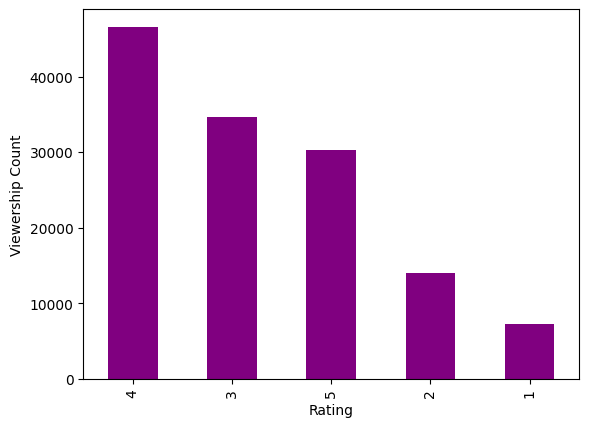

In [19]:
a = movie_ratings.groupby("Rating").size().sort_values(ascending=False)
plt.xlabel("Rating")
plt.ylabel("Viewership Count")
a.plot(kind="bar",color = ['purple'])
plt.show()

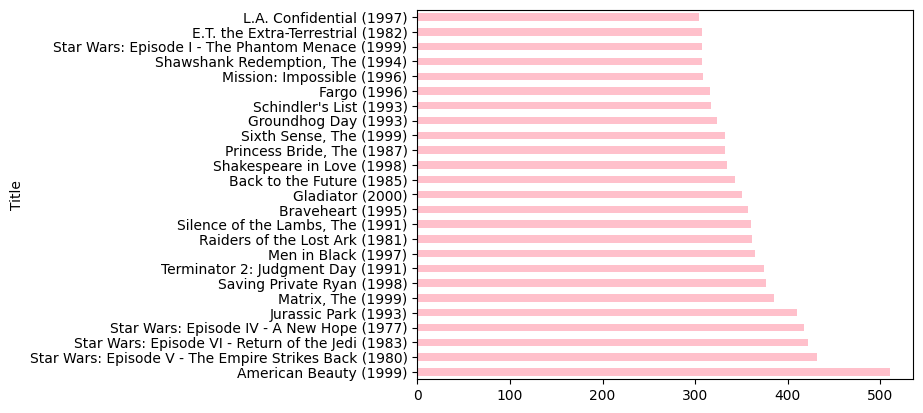

In [20]:
# Ratings for all the movies reviewed by a particular user whose user ID is 700
import  matplotlib.pyplot as plt
a = movie_ratings.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
a.plot(kind="barh", color = ['pink'])
plt.show()

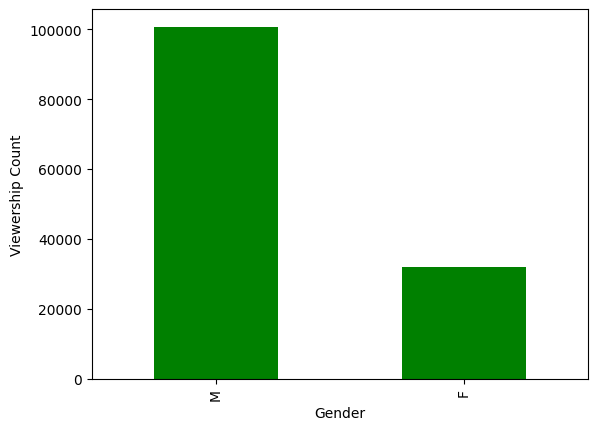

In [48]:

a = df.groupby("Gender").size().sort_values(ascending=False)
plt.xlabel("Gender")
plt.ylabel("Viewership Count")
a.plot(kind="bar",color = ['green'])
plt.show()

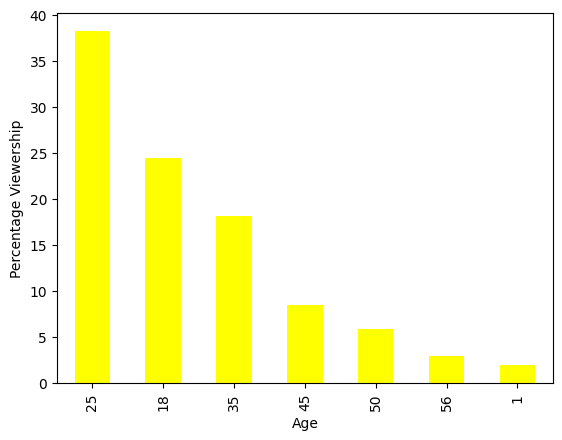

In [52]:
a = df.groupby("Age").size().sort_values(ascending=False)[:25]
plt.xlabel("Age")
plt.ylabel("Percentage Viewership")
total_viewership = len(df)
a_per = (a / total_viewership) * 100

a_per.plot(kind="bar",color = ['yellow'])
plt.show()

MACHINE LEARNING¶

In [64]:
gender = {'F':1, 'M':2}
df['Gender'] = df['Gender'].replace(gender)

In [65]:
features = df[['MovieID', 'Age', 'Occupation', 'Gender','UserID']].values

labels = df[['Rating']].values

In [66]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

LOGISTIC REGRESSION¶

In [67]:
model = LogisticRegression()
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy = model.score(train, train_labels)
accuracy

0.35122330009678365

K NEAREST NEIGHBOURS CLASSIFIER

In [68]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy = model.score(train, train_labels)
accuracy

0.6043800220576651

GAUSSIAN NAIVE BAYES

In [70]:
model = GaussianNB()
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy = model.score(train, train_labels)
accuracy

0.35176348781201466

DECISION TREES

In [71]:
model = DecisionTreeClassifier()
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy = model.score(train, train_labels)
accuracy

1.0

RANDOM FOREST CLASSIFIER

In [72]:
model = RandomForestClassifier()
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy = model.score(train, train_labels)
accuracy

0.9999662382677981